In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
sales=pd.read_csv('./Data/Clean/clean_data.csv')
sales.head()

,ID,Product,Quantity_ordered,Price_each,Order_date,Street,City,State,Zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA,2215
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001


# The best month(s) for sales

In [3]:
sales.Order_date=pd.to_datetime(sales.Order_date)

In [4]:
sales['Year']=sales.Order_date.dt.year
sales['Month']=sales.Order_date.dt.month

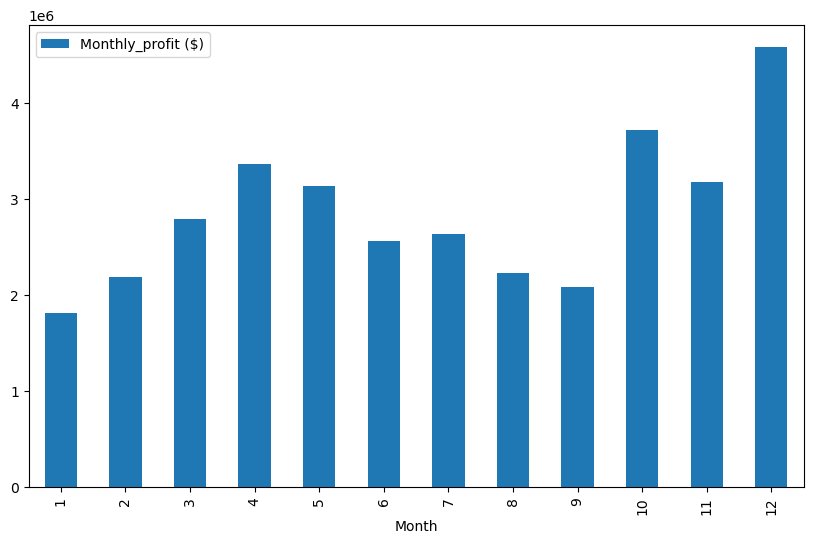

In [5]:
sales.groupby('Month')[['Price_each']].sum().rename({'Price_each':'Monthly_profit ($)'},axis=1).plot(kind='bar',figsize=(10,6))
plt.show()

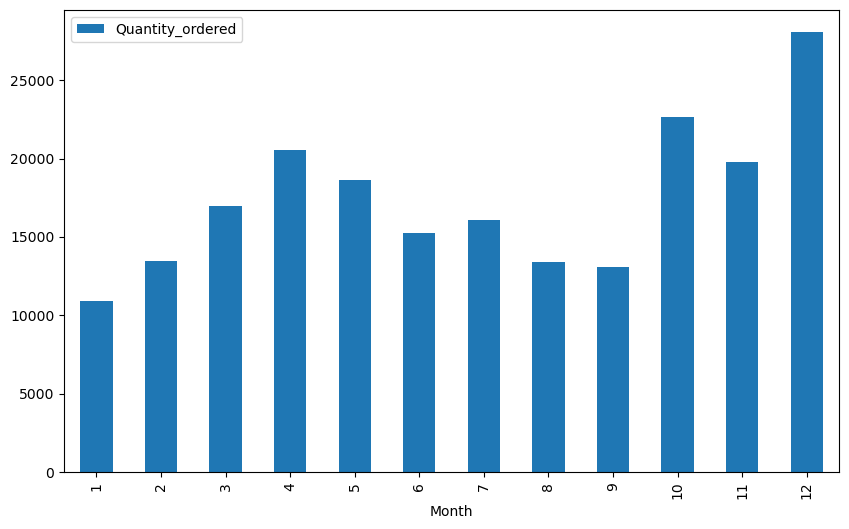

In [6]:
sales.groupby('Month')[['Quantity_ordered']].sum().plot(kind='bar',figsize=(10,6))
plt.show()

In `December` we have the highest sales

# Sales by City

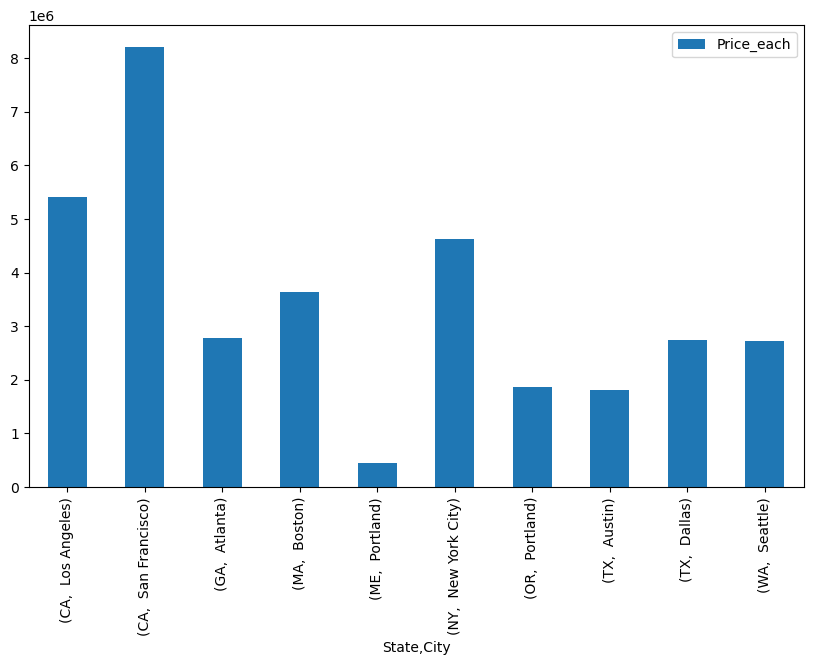

In [7]:
sales.groupby(['State','City'])[['Price_each']].sum().plot(kind='bar',figsize=(10, 6))
plt.show()

The highest sale is in `San Francisco`

<br>
Why San Francisco?
<br>
It is probably because the products we are analyzing here include mostly electronic devices:

> sales.Product.unique()

In [8]:
sales.Product.unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

# When is good time to advertise?

In [9]:
sales.head()

,ID,Product,Quantity_ordered,Price_each,Order_date,Street,City,State,Zip_code,Year,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,917 1st St,Dallas,TX,75001,2019,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,682 Chestnut St,Boston,MA,2215,2019,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,2019,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,2019,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,333 8th St,Los Angeles,CA,90001,2019,4


In [10]:
sales['hour']=sales.Order_date.dt.hour
sales['minute']=sales.Order_date.dt.minute

In [11]:
sales.hour.unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

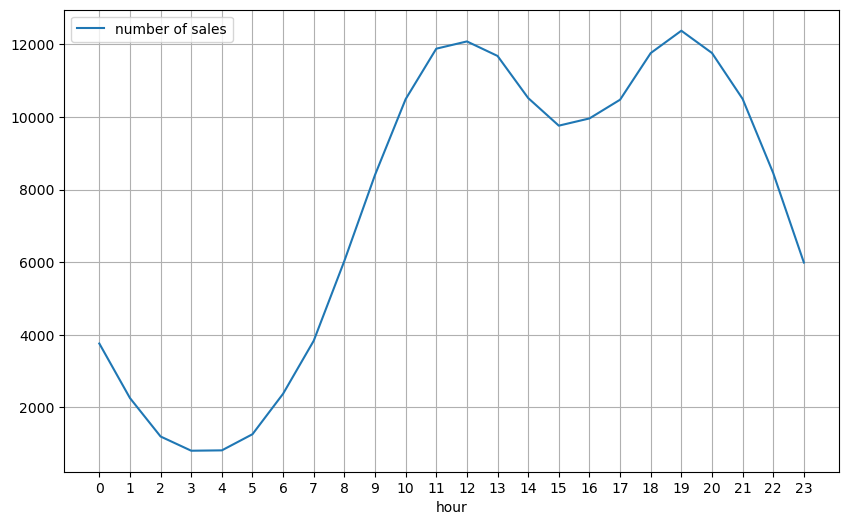

In [12]:
sales.groupby('hour')[['ID']].nunique().rename({'ID':'number of sales'},axis=1).plot(kind='line',figsize=(10,6))
plt.xticks(range(0,24))
plt.grid()
plt.show()

Between `11:00 - 13:00` and `18:00 - 20:00` could be good time to push advertisement

# Which products are sold together?

In [13]:
sales[sales.duplicated('ID',keep=False)].sort_values(by='ID')

,ID,Product,Quantity_ordered,Price_each,Order_date,Street,City,State,Zip_code,Year,Month,hour,minute
67164,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,610 Walnut St,Austin,TX,73301,2019,1,16,6
67165,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,610 Walnut St,Austin,TX,73301,2019,1,16,6
67180,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,4 1st St,Los Angeles,CA,90001,2019,1,8,25
67181,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,4 1st St,Los Angeles,CA,90001,2019,1,8,25
67256,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,20 Dogwood St,New York City,NY,10001,2019,1,11,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55066,319584,Wired Headphones,1,11.99,2019-12-11 00:30:00,537 Sunset St,Portland,OR,97035,2019,12,0,30
55078,319596,iPhone,1,700.00,2019-12-01 08:44:00,436 14th St,New York City,NY,10001,2019,12,8,44
55079,319596,Lightning Charging Cable,1,14.95,2019-12-01 08:44:00,436 14th St,New York City,NY,10001,2019,12,8,44
55114,319631,34in Ultrawide Monitor,1,379.99,2019-12-17 22:35:00,363 Highland St,Austin,TX,73301,2019,12,22,35


In [14]:
sales['Grouped']=sales.groupby('ID')[['Product']].transform(lambda x: ','.join(x))
sales['Grouped_count']=sales.groupby('ID')[['Product']].transform('count')

In [15]:
sales[sales.Grouped_count>1].head()

,ID,Product,Quantity_ordered,Price_each,Order_date,Street,City,State,Zip_code,Year,Month,hour,minute,Grouped,Grouped_count
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,2019,4,14,38,"Google Phone,Wired Headphones",2
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,669 Spruce St,Los Angeles,CA,90001,2019,4,14,38,"Google Phone,Wired Headphones",2
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,20 Hill St,Los Angeles,CA,90001,2019,4,19,42,"Google Phone,USB-C Charging Cable",2
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,20 Hill St,Los Angeles,CA,90001,2019,4,19,42,"Google Phone,USB-C Charging Cable",2
30,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,365 Center St,San Francisco,CA,94016,2019,4,17,0,"AAA Batteries (4-pack),Google Phone",2


In [16]:
# 10 most common group of producst bought together
(
    sales[sales.Grouped_count>1].groupby(['Grouped'])['ID'].count()/
    sales[sales.Grouped_count>1].groupby(['Grouped'])['Grouped_count'].first()
).sort_values(ascending=False).head(10)

Grouped
iPhone,Lightning Charging Cable                       886.0
Google Phone,USB-C Charging Cable                     857.0
iPhone,Wired Headphones                               361.0
Vareebadd Phone,USB-C Charging Cable                  312.0
Google Phone,Wired Headphones                         303.0
iPhone,Apple Airpods Headphones                       286.0
Google Phone,Bose SoundSport Headphones               161.0
Vareebadd Phone,Wired Headphones                      104.0
Google Phone,USB-C Charging Cable,Wired Headphones     79.0
Vareebadd Phone,Bose SoundSport Headphones             60.0
dtype: float64

# What products sold the most, and why?

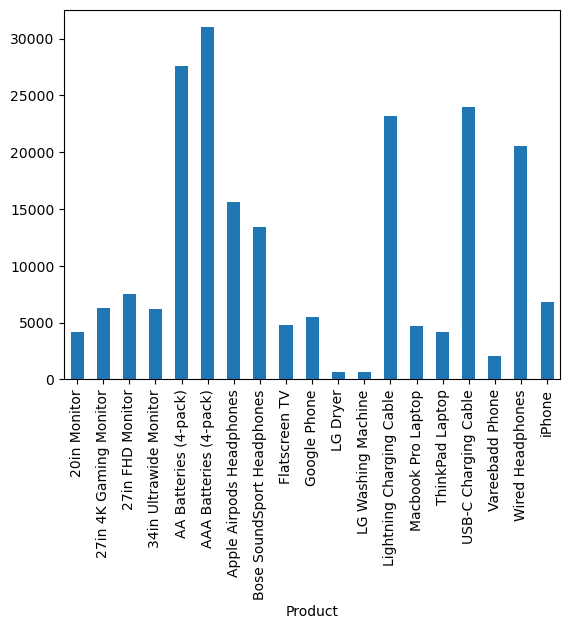

In [17]:
sales.groupby('Product')['Quantity_ordered'].sum().plot(kind='bar')
sales.groupby('Product')['Price_each'].first().plot(kind='bar')

plt.show()

In [18]:
products=sales.groupby('Product',as_index=False)[['Quantity_ordered','Price_each']].agg({
    'Quantity_ordered':'count',
    'Price_each':'mean'
}).sort_values(by='Quantity_ordered',ascending=False)

products

,Product,Quantity_ordered,Price_each
15,USB-C Charging Cable,21859,11.95
12,Lightning Charging Cable,21610,14.95
5,AAA Batteries (4-pack),20612,2.99
4,AA Batteries (4-pack),20558,3.84
17,Wired Headphones,18849,11.99
6,Apple Airpods Headphones,15525,150.00
7,Bose SoundSport Headphones,13298,99.99
2,27in FHD Monitor,7498,149.99
18,iPhone,6840,700.00
1,27in 4K Gaming Monitor,6225,389.99


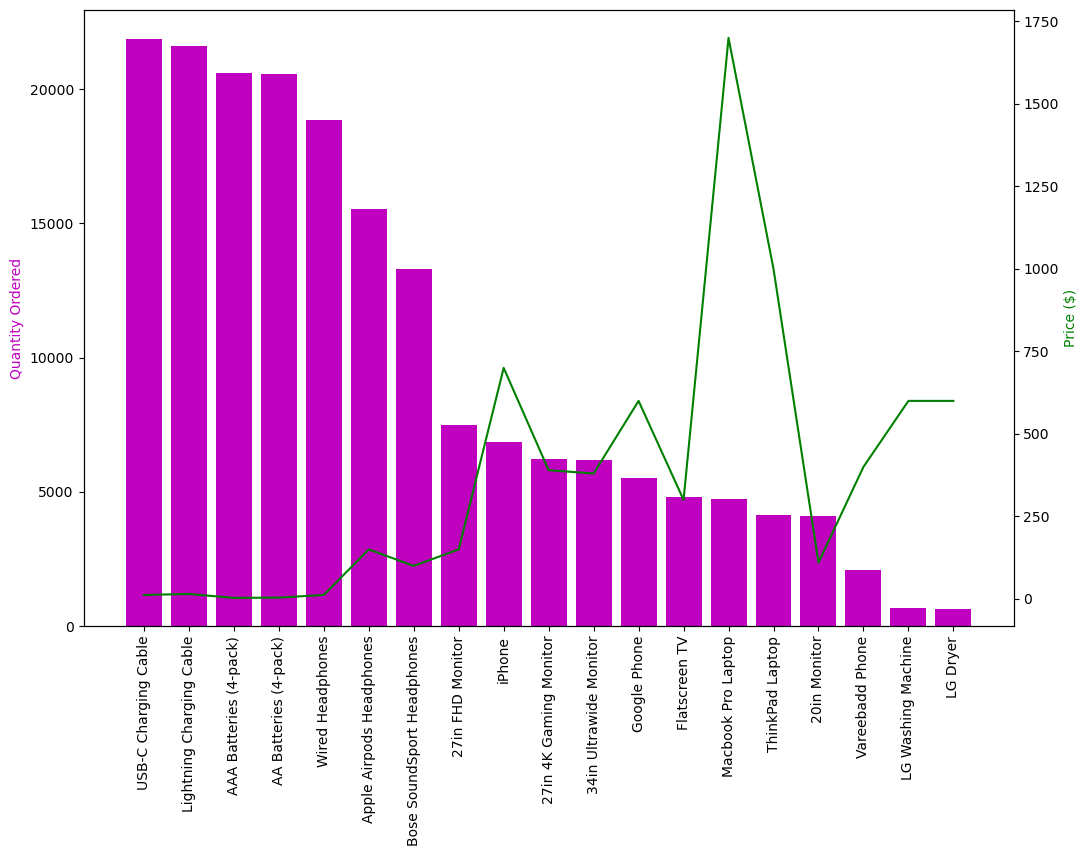

In [19]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2=ax1.twinx()

ax1.bar(products.Product,products.Quantity_ordered,color='m')
ax2.plot(products.Product,products.Price_each,color='g')

ax1.set_ylabel('Quantity Ordered',color='m')
ax2.set_ylabel('Price ($)',color='g')
ax1.set_xticklabels(products.Product, rotation='vertical')

plt.show()

` As we can see from above, cheaper products are sold in more quantity while the more expensive products are sold in less quantity `